In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
path_ede1 = r"C:\Users\Dell\Desktop\REP\rep1.csv"
path_ede2 = r"C:\Users\Dell\Desktop\REP\rep2.csv"

columns = list(range(3, 11))
m1 = np.loadtxt(path_ede1, usecols=columns, dtype=np.float, delimiter=",")
m2 = np.loadtxt(path_ede2, usecols=columns, dtype=np.float, delimiter=",")
print(m1)

[[ 4.51000000e+05  1.73000000e+05  1.13000000e+02 ... -1.00000000e+00
   1.01180000e+04  7.20000000e+01]
 [ 4.51000000e+05  1.73000000e+05  1.43000000e+02 ... -1.00000000e+00
   1.01720000e+04  8.00000000e+01]
 [ 4.51000000e+05  1.73000000e+05  2.61000000e+02 ...  0.00000000e+00
   1.01810000e+04  4.90000000e+01]
 ...
 [ 4.54655759e+05  1.72419573e+05  1.16000000e+02 ...  8.00000000e+00
   1.01300000e+04  8.30000000e+01]
 [ 4.91451100e+05  9.84214817e+04  1.16000000e+02 ...  8.00000000e+00
   1.01300000e+04  8.30000000e+01]
 [ 4.51583299e+05  1.75606953e+05  1.45000000e+02 ...  4.50000000e+01
   1.01500000e+04  8.00000000e+01]]


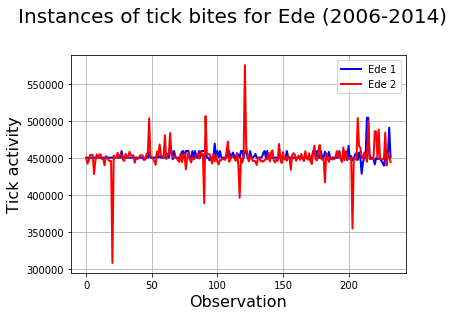

In [3]:
title= plt.suptitle("Instances of tick bites for Ede (2006-2014)", size=20)
title.set_position([.5, 1.05])
e1 = m1[:, 0]
e2 = m2[:, 0]
xlinspace = np.linspace(0, len(e1) - 1, len(e1))
plt.plot(xlinspace, e1, "b-", label="Ede 1", linewidth=2)
plt.plot(xlinspace, e2, "r-", label="Ede 2", linewidth=2)
plt.ylabel("Tick activity", size=16)
plt.xlabel("Observation", size=16)
plt.legend()
plt.grid()
plt.show()

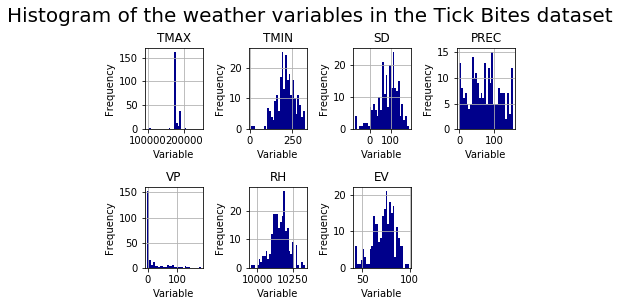

In [4]:
labels = ['TMAX','TMIN','SD','PREC','VP','RH','EV']
title= plt.suptitle('Histogram of the weather variables in the Tick Bites dataset', size=20)
title.set_position([.5, 1.05])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 8):
    current_feature = m1[:, i]
    plt.subplot(2, 4, i)
    plt.title(labels[i - 1], size=12)
    plt.hist(current_feature, bins=30, color="darkblue")
    plt.xlabel("Variable", size=10)
    plt.ylabel("Frequency", size=10)
    plt.grid()
    plt.tight_layout()
plt.show()

In [5]:
# Separate the raw matrices into X and Y
xtrain = m1[:, 1:]
ytrain = m1[:, 0]
xtest = m2[:, 1:]
ytest = m2[:, 0]

In [6]:
rf = RandomForestRegressor(n_estimators=100, criterion="mse", max_depth=None, max_features="auto", bootstrap=True,
                           min_samples_split=2, n_jobs=1)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
print("RF: ", r2_score(ytest, ypred))

zipped_rf = list (zip (labels, rf.feature_importances_))
print(zipped_rf)

RF:  -0.20402082787559106
[('TMAX', 0.955997695138387), ('TMIN', 0.00983222218120632), ('SD', 0.00917935002445757), ('PREC', 0.004622048455305755), ('VP', 0.004851496456727972), ('RH', 0.011415535408393575), ('EV', 0.004101652335521909)]


In [7]:
# Apply GBR
gb = GradientBoostingRegressor(n_estimators=100, loss="ls", learning_rate=0.1, criterion="friedman_mse")
gb.fit(xtrain, ytrain)
ypred = gb.predict(xtest)
print("GB: ", r2_score(ytest, ypred))

zipped_gb = list (zip (labels, gb.feature_importances_))
print(zipped_gb)

GB:  -0.26462653812247305
[('TMAX', 0.9590489993986908), ('TMIN', 0.005841706607752705), ('SD', 0.013737204423274214), ('PREC', 0.008392523322529164), ('VP', 0.004997291206281645), ('RH', 0.0037858289484320002), ('EV', 0.004196446093039448)]
